In [2]:
#Using Gaussian processes for regression

In [8]:
from sklearn.datasets import fetch_california_housing
import numpy as np

# Load the California housing dataset
california = fetch_california_housing()
california_X = california.data
california_y = california.target

# Create a boolean array for the training set selection
train_set = np.random.choice([True, False], len(california_y), p=[.75, .25])

# Split the data into training and testing sets
X_train = california_X[train_set]
y_train = california_y[train_set]
X_test = california_X[~train_set]
y_test = california_y[~train_set]

# Display the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)



X_train shape: (15461, 8)
y_train shape: (15461,)
X_test shape: (5179, 8)
y_test shape: (5179,)


In [10]:
from sklearn.gaussian_process import GaussianProcessRegressor
gpr = GaussianProcessRegressor()
gpr

GaussianProcessRegressor()

In [12]:
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as CK
 
mixed_kernel = kernel = CK(1.0, (1e-4, 1e4)) * RBF(10, (1e-4, 1e4))

In [14]:
gpr = GaussianProcessRegressor(alpha=5,
                                n_restarts_optimizer=20,
                                kernel = mixed_kernel)

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
import numpy as np
from matplotlib import pyplot as plt

# Load the California housing dataset
california = fetch_california_housing()
X, y = california.data, california.target

# Create a boolean array for the training set selection
train_set = np.random.choice([True, False], len(y), p=[.75, .25])

# Split the data into training and testing sets
X_train, y_train = X[train_set], y[train_set]
X_test, y_test = X[~train_set], y[~train_set]

# Define the kernel for the Gaussian Process
kernel = C(1.0, (1e-4, 1e1)) * RBF(1.0, (1e-4, 1e1))

# Create the Gaussian Process Regressor
gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)

# Fit the model
gpr.fit(X_train, y_train)

# Predict on the test set
test_preds = gpr.predict(X_test)

# Plotting
f, ax = plt.subplots(figsize=(10, 7), nrows=3)
f.tight_layout()

ax[0].plot(range(len(test_preds)), test_preds, label='Predicted Values')
ax[0].plot(range(len(test_preds)), y_test, label='Actual Values')
ax[0].set_title("Predicted vs Actuals")
ax[0].legend(loc='best')

ax[1].plot(range(len(test_preds)), test_preds - y_test)
ax[1].set_title("Plotted Residuals")

ax[2].hist(test_preds - y_test, bins=30)
ax[2].set_title("Histogram of Residuals")

plt.show()


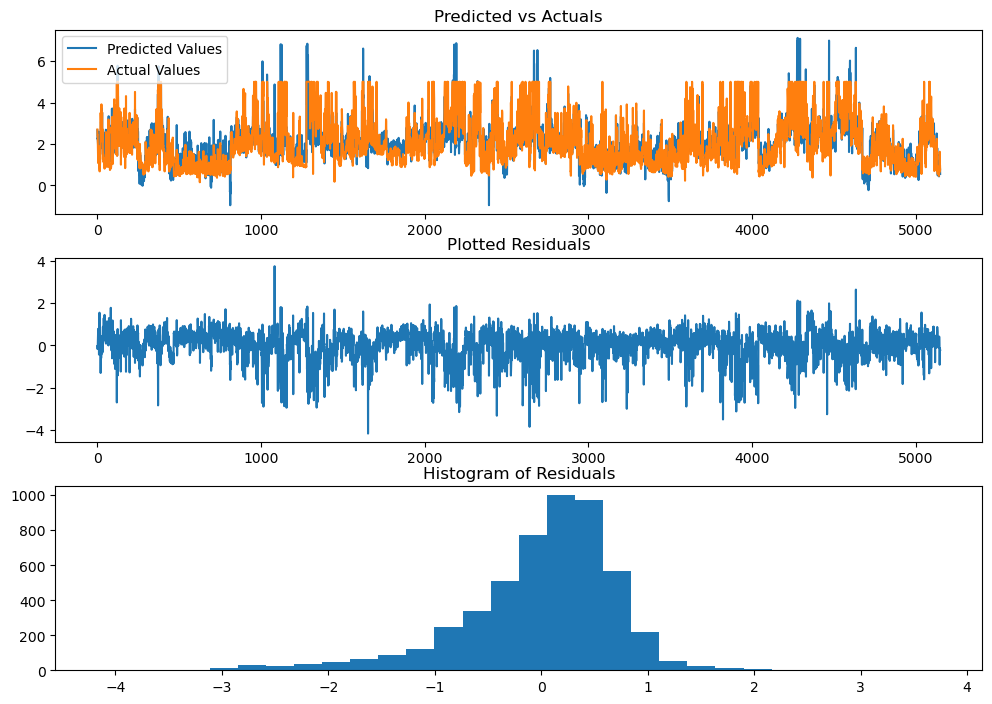

In [20]:
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing
import numpy as np
from matplotlib import pyplot as plt

# Load the California housing dataset
california = fetch_california_housing()
X, y = california.data, california.target

# Create a boolean array for the training set selection
train_set = np.random.choice([True, False], len(y), p=[.75, .25])

# Split the data into training and testing sets
X_train, y_train = X[train_set], y[train_set]
X_test, y_test = X[~train_set], y[~train_set]

# Fit the model and make predictions
model = LinearRegression()
model.fit(X_train, y_train)
test_preds = model.predict(X_test)

# Plotting
f, ax = plt.subplots(figsize=(10, 7), nrows=3)
f.tight_layout()

ax[0].plot(range(len(test_preds)), test_preds, label='Predicted Values')
ax[0].plot(range(len(test_preds)), y_test, label='Actual Values')
ax[0].set_title("Predicted vs Actuals")
ax[0].legend(loc='best')

ax[1].plot(range(len(test_preds)), test_preds - y_test)
ax[1].set_title("Plotted Residuals")

ax[2].hist(test_preds - y_test, bins=30)
ax[2].set_title("Histogram of Residuals")

plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score
 
gpr5 = GaussianProcessRegressor(alpha=5,
                                n_restarts_optimizer=20,
                                kernel = mixed_kernel)
 
scores_5 = (cross_val_score(gpr5,
                             boston_X[train_set],
                             boston_y[train_set],
                             cv = 4,
                             scoring = 'neg_mean_absolute_error'))

In [ ]:
def score_mini_report(scores_list):
     print "List of scores: ", scores_list
     print "Mean of scores: ", scores_list.mean()
     print "Std of scores: ", scores_list.std()
     
score_mini_report(scores_5)

In [ ]:
gpr7 = GaussianProcessRegressor(alpha=7,
                                n_restarts_optimizer=20,
                                kernel = mixed_kernel)
 
scores_7 = (cross_val_score(gpr7,
                             boston_X[train_set],
                             boston_y[train_set],
                             cv = 4,
                             scoring = 'neg_mean_absolute_error'))
score_mini_report(scores_7)

In [ ]:
from sklearn.model_selection import cross_val_score
 
gpr7n = GaussianProcessRegressor(alpha=7,
                                n_restarts_optimizer=20,
                                kernel = mixed_kernel,
                                normalize_y=True)
 
scores_7n = (cross_val_score(gpr7n,
                             boston_X[train_set],
                             boston_y[train_set],
                             cv = 4,
                             scoring = 'neg_mean_absolute_error'))
score_mini_report(scores_7n)

In [ ]:
gpr7n.fit(boston_X[train_set],boston_y[train_set])

In [ ]:
test_preds = gpr7n.predict(boston_X[~train_set])

In [14]:
gpr_new = GaussianProcessRegressor(alpha=boston_y[train_set]/4,
                                  n_restarts_optimizer=20,
                                  kernel = mixed_kernel)

In [15]:
test_preds, MSE = gpr7n.predict(boston_X[~train_set], return_std=True)
MSE[:5]

array([  1.68823681,   2.70357163,  13.59415512,   2.45728218,   0.87065486])

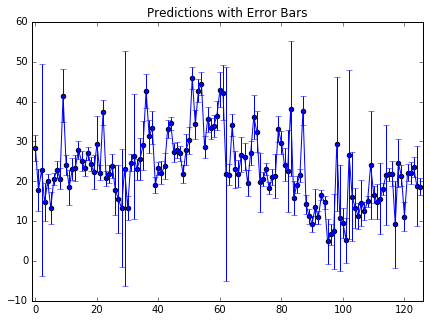

In [19]:
f, ax = plt.subplots(figsize=(7, 5))
n = MSE.shape[0]
rng = range(n)
ax.scatter(rng, test_preds[:n])
ax.errorbar(rng, test_preds[:n], yerr=1.96*MSE[:n])
ax.set_title("Predictions with Error Bars")
ax.set_xlim((-1, n));